<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# import data
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [3]:
# store data in dataframe form
cali_df = pd.DataFrame(X, columns=cali.feature_names)
price = pd.concat([cali_df, pd.DataFrame(y, columns=cali.target_names)], axis=1)

In [4]:
# change columns name to lower
price.columns = price.columns.str.lower()

In [5]:
# display 5 row
price.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# check info of df
price.info()

# no missing value
# all features are correct type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   medinc       20640 non-null  float64
 1   houseage     20640 non-null  float64
 2   averooms     20640 non-null  float64
 3   avebedrms    20640 non-null  float64
 4   population   20640 non-null  float64
 5   aveoccup     20640 non-null  float64
 6   latitude     20640 non-null  float64
 7   longitude    20640 non-null  float64
 8   medhouseval  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


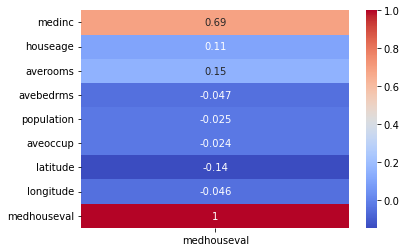

In [7]:
# check correlation each variable to target(medhouseval)
sns.heatmap(price.corr()[['medhouseval']], annot=True, cmap='coolwarm');

### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [8]:
# create X and y which drop latitude and longtitude
X = price.drop(columns=['latitude', 'longitude', 'medhouseval'])
y = price['medhouseval']

In [9]:
# train test split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=42)

In [10]:
# Standardization
sc = StandardScaler()
X_train_sc_1 = sc.fit_transform(X_train_1)
X_test_sc_1 = sc.transform(X_test_1)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [11]:
# check shape for assign input shape
X.shape

(20640, 6)

In [12]:
# create simple FNNs 
# input --> hidden 24 nodes --> output use relu in activation
model = Sequential()

# input layer
model.add(Dense(8, activation='relu', input_shape=(6,)))
# hidden layer
model.add(Dense(24, activation='relu'))
# output layer
model.add(Dense(1, activation=None))

Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [13]:
# use adam for optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [14]:
# fit model with epoch 100
history = model.fit(X_train_sc_1, y_train_1,
                   epochs=100,
                   batch_size=2048,
                   validation_data=(X_test_sc_1, y_test_1),
                   verbose=0)

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

In [15]:
# create function for plot loss in model
def plot_loss(model):
    print(f"Loss Train {model.history['loss'][-1]}, Loss Test {model.history['val_loss'][-1]}")
    plt.plot(model.history['loss'], label='Train')
    plt.plot(model.history['val_loss'], label='Test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend();

Loss Train 0.5607776045799255, Loss Test 0.5701339244842529


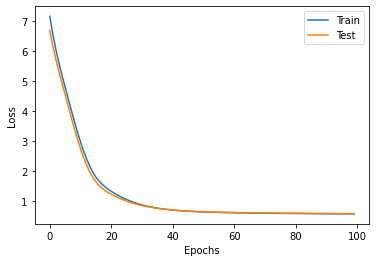

In [16]:
# No overfitting
plot_loss(history)

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [17]:
# create X and y
X = price.drop(columns=['medhouseval'])
y = price['medhouseval']

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Standardization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
# model_2
# input --> hidden 64, 128, 64 nodes --> output use relu in activation
model_2 = Sequential()

# input layer
model_2.add(Dense(8, activation='relu', input_shape=(8,)))
# hidden layer
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(64, activation='relu'))
# output layer
model_2.add(Dense(1, activation=None))

In [21]:
# use adam for optimizer
model_2.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
# fit model with epoch 100
history_2 = model_2.fit(X_train_sc, y_train,
                   epochs=100,
                   batch_size=128,
                   validation_data=(X_test_sc, y_test),
                   verbose=0)

Loss Train 0.23001955449581146, Loss Test 0.273868203163147


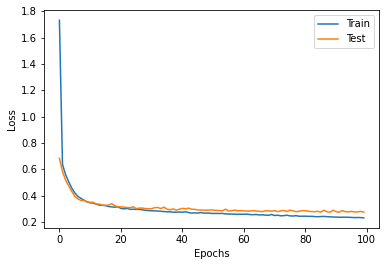

In [23]:
# plot loss and model perform better which decrease loss rate and has chance of overfitting
# it different around 5% to train and test
plot_loss(history_2)

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

##### Does this change anything?

In [24]:
# model_3
# input --> batchnormalization --> hidden 64, 128, 64 nodes --> output use relu in activation
model_3 = Sequential()

# input layer
model_3.add(Dense(8, activation='relu', input_shape=(8,)))
# hidden layer
model_3.add(BatchNormalization())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
# output layer
model_3.add(Dense(1, activation=None))

In [25]:
# use adam for optimizer
model_3.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
# fit model with epoch 100
history_3 = model_3.fit(X_train_sc, y_train,
                   epochs=100,
                   batch_size=128,
                   validation_data=(X_test_sc, y_test),
                   verbose=0)

Loss Train 0.24945305287837982, Loss Test 0.34202682971954346


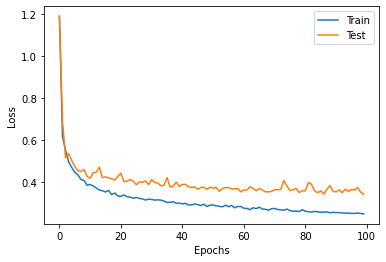

In [27]:
# loss rates have increase 6% compare to model_2 and have chance be overfitting it different around 10%
plot_loss(history_3)

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [28]:
# early stopping
es = EarlyStopping(patience=5)
# model_4
# early stoping with 5 patiences --> input --> batchnormalization 
# --> hidden 64, 128, 64 nodes --> output use relu in activation
model_4 = Sequential()

# input layer
model_4.add(Dense(8, activation='relu', input_shape=(8,)))
# hidden layer
model_4.add(BatchNormalization())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(64, activation='relu'))
# output layer
model_4.add(Dense(1, activation=None))

In [29]:
# use adam for optimizer
model_4.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
# epoch should be around 80 - 100 if model didn't perform better earlystopping will stop for us
history_4 = model_4.fit(X_train_sc, y_train,
                   epochs=80,
                   batch_size=128,
                   validation_data=(X_test_sc, y_test),
                   callbacks=[es],
                   verbose=0)

Loss Train 0.2742461562156677, Loss Test 0.2887748181819916


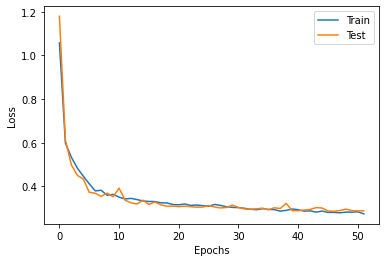

In [31]:
# model perform better with early stopping from previous model test loss is 35% but with es test loss is 28% 
# which better than previous model
plot_loss(history_4)

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [32]:
# early stopping
es = EarlyStopping(patience=5)
# model_5
# early stoping with 5 patiences --> input --> batchnormalization 
# --> hidden 64, 128(dropout = 5%), 64(dropout=20%) nodes --> output use relu in activation
model_5 = Sequential()

# input layer
model_5.add(Dense(8, activation='relu', input_shape=(8,)))
# hidden layer
model_5.add(BatchNormalization())
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(.05))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dropout(.2))
# # output layer
model_5.add(Dense(1, activation=None))

In [33]:
# use adam for optimizer
model_5.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
# fit model with 100 epochs
history_5 = model_5.fit(X_train_sc, y_train,
                   epochs=100,
                   batch_size=128,
                   validation_data=(X_test_sc, y_test),
                   callbacks=[es],
                   verbose=0)

Loss Train 0.3235343396663666, Loss Test 0.3985673785209656


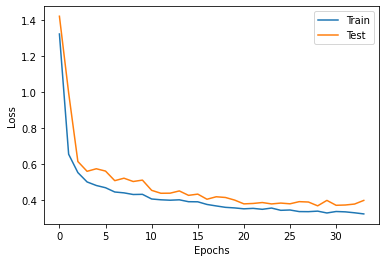

In [35]:
# model perform wrose than previous models which increase test loss 10% and also overfitting
plot_loss(history_5)

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [36]:
# create function for calculate RMSE score
def cal_rmse(model, X_test_sc, y_test):
    return round(mean_squared_error(y_test, model.predict(X_test_sc, verbose=0)), 2)

In [37]:
print(f'Baseline model RMSE score {cal_rmse(model, X_test_sc_1, y_test_1)}')
print(f'Model 2 RMSE score {cal_rmse(model_2, X_test_sc, y_test)}')
print(f'Model 3 RMSE score {cal_rmse(model_3, X_test_sc, y_test)}')
print(f'Model 4 RMSE score {cal_rmse(model_4, X_test_sc, y_test)}')
print(f'Model 5 RMSE score {cal_rmse(model_5, X_test_sc, y_test)}')

Baseline model RMSE score 0.57
Model 2 RMSE score 0.27
Model 3 RMSE score 0.34
Model 4 RMSE score 0.29
Model 5 RMSE score 0.4


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [38]:
# early stopping
es = EarlyStopping(patience=5)
# model_6
# early stoping with 5 patiences --> input --> batchnormalization 
# --> hidden 64, 128(dropout = 5%), 64(dropout=20%) nodes --> output use relu in activation
# all layers have L2 regularizer
model_6 = Sequential()

# input layer
model_6.add(Dense(8, activation='relu', input_shape=(8,), kernel_regularizer=l2()))
# hidden layer
model_6.add(BatchNormalization())
model_6.add(Dense(64, activation='relu', kernel_regularizer=l2()))
model_6.add(Dense(128, activation='relu', kernel_regularizer=l2()))
model_6.add(Dropout(.05))
model_6.add(Dense(64, activation='relu', kernel_regularizer=l2()))
model_6.add(Dropout(.2))
# # output layer
model_6.add(Dense(1, activation=None, kernel_regularizer=l2()))

model_6.compile(loss='mean_squared_error', optimizer='adam')

history_6 = model_6.fit(X_train_sc, y_train,
                   epochs=100,
                   batch_size=128,
                   validation_data=(X_test_sc, y_test),
                   callbacks=[es],
                   verbose=0)

Loss Train 0.4270804822444916, Loss Test 0.4408905804157257


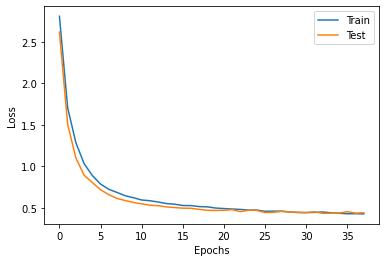

In [39]:
# model perform worse than model_5 loss increase around 10% but no overfitting
# maybe assign too much regularizer in each dense
plot_loss(history_6)

In [40]:
print(f'Model 6 RMSE score {cal_rmse(model_6, X_test_sc, y_test)}')

Model 6 RMSE score 0.37


#### Compare All models

In [49]:
# RMSE of all models
print(f'Baseline model RMSE score {cal_rmse(model, X_test_sc_1, y_test_1)}')
print(f'Model 2 RMSE score {cal_rmse(model_2, X_test_sc, y_test)}')
print(f'Model 3 RMSE score {cal_rmse(model_3, X_test_sc, y_test)}')
print(f'Model 4 RMSE score {cal_rmse(model_4, X_test_sc, y_test)}')
print(f'Model 5 RMSE score {cal_rmse(model_5, X_test_sc, y_test)}')
print(f'Model 6 RMSE score {cal_rmse(model_6, X_test_sc, y_test)}')

Baseline model RMSE score 0.57
Model 2 RMSE score 0.27
Model 3 RMSE score 0.34
Model 4 RMSE score 0.29
Model 5 RMSE score 0.4
Model 6 RMSE score 0.37


In [42]:
# create function for plot loss in model
def plot_loss_compare(model, model_name,title=None):
    print(f"MSE Train {model.history['loss'][-1]}, MSE Test {model.history['val_loss'][-1]}")
    plt.title(str(f'{model_name} RMSE score {title}'))
    plt.plot(model.history['loss'], label='Train')
    plt.plot(model.history['val_loss'], label='Test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend();

MSE Train 0.5607776045799255, MSE Test 0.5701339244842529


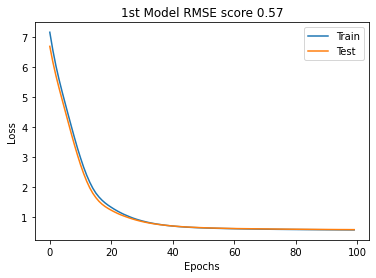

In [43]:
plot_loss_compare(history, '1st Model',cal_rmse(model, X_test_sc_1, y_test_1))

MSE Train 0.23001955449581146, MSE Test 0.273868203163147


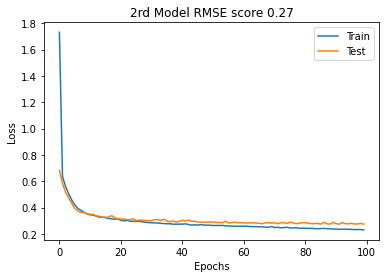

In [44]:
plot_loss_compare(history_2, '2rd Model',cal_rmse(model_2, X_test_sc, y_test))

MSE Train 0.24945305287837982, MSE Test 0.34202682971954346


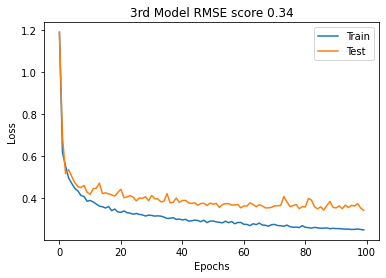

In [45]:
plot_loss_compare(history_3, '3rd Model',cal_rmse(model_3, X_test_sc, y_test))

MSE Train 0.2742461562156677, MSE Test 0.2887748181819916


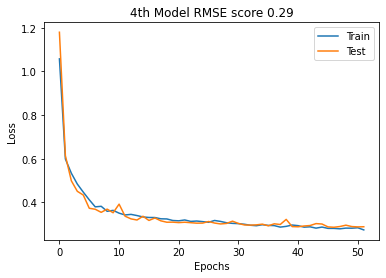

In [46]:
plot_loss_compare(history_4, '4th Model',cal_rmse(model_4, X_test_sc, y_test))

MSE Train 0.3235343396663666, MSE Test 0.3985673785209656


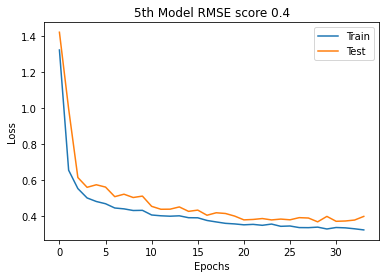

In [47]:
plot_loss_compare(history_5, '5th Model',cal_rmse(model_5, X_test_sc, y_test))

MSE Train 0.4270804822444916, MSE Test 0.4408905804157257


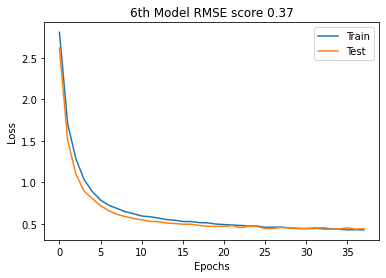

In [48]:
plot_loss_compare(history_6, '6th Model',cal_rmse(model_6, X_test_sc, y_test))

From all models I choose second model which has less complexity than all of models.

this is a structure of second model.

input --> hidden 64, 128, 64 nodes --> output use relu in activation

RMSE score from second model is 0.29

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [50]:
# save second model
model_2.save('model/cali_housing.h5')